In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("ztrain_Yash2001.csv")
bands = ['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z']
z_spec = df['z']
magnitudes = df[bands].copy()

mean_mags = magnitudes.mean()
mean_z = z_spec.mean()
delta_mags = magnitudes - mean_mags
delta_z = z_spec - mean_z

cov_matrix = np.cov(delta_mags.T, bias=False)
cov_vector = np.array([np.cov(delta_z, delta_mags[band], bias=False)[0,1] for band in bands])

b_k = np.linalg.solve(cov_matrix, cov_vector)
b_0 = mean_z - np.sum(b_k * mean_mags)
z_phot = b_0 + np.dot(magnitudes, b_k)
residuals = z_spec - z_phot

# Print results
print("b_k coefficients:", b_k)
print("b_0:", b_0)
print("RMS error:", np.sqrt(np.mean(residuals**2)))
print("Mean residual (bias):", np.mean(residuals))

b_k coefficients: [ 0.01455839  0.08880067 -0.00486052 -0.0258905  -0.02536246]
b_0: -0.8294912322890373
RMS error: 0.04618478867396386
Mean residual (bias): 9.762062681583333e-17


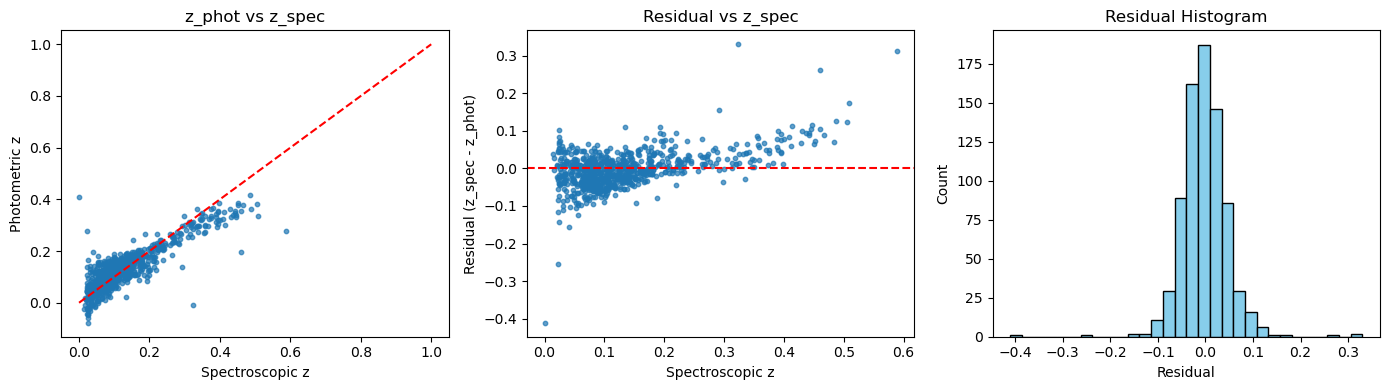

RMS error: 0.04949237186975351
Mean residual (bias): -0.0026157758162665226

Outliers (|residual| > 0.1):
                   objID         z    z_phot  residual
0    1237654880198394002  0.040338  0.197433 -0.157095
27   1237659346953110002  0.508671  0.333885  0.174786
52   1237651274035364002  0.030972  0.131522 -0.100550
75   1237655369287336002  0.292273  0.136606  0.155667
79   1237655472361243002  0.055014  0.179091 -0.124077
165  1237652946916606002 -0.000110  0.410580 -0.410690
182  1237667736657789002  0.191990  0.083103  0.108888
212  1237667253459682002  0.505495  0.382276  0.123219
217  1237668495783887002  0.022886  0.138699 -0.115813
223  1237657628431680002  0.022832  0.276582 -0.253750
268  1237658300595110002  0.322524 -0.007595  0.330119
277  1237662246595789002  0.024300  0.166322 -0.142022
313  1237662661607293002  0.031069  0.140452 -0.109383
354  1237657630049436002  0.487669  0.361508  0.126161
391  1237665530645840002  0.052488  0.158511 -0.106023
408  123765076

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_target = pd.read_csv("ztarget_Yash2001.csv")

bands = ['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z']
z_spec_target = df_target['z']
magnitudes_target = df_target[bands]

b_k = np.array([0.01455839, 0.08880067, -0.00486052, -0.0258905, -0.02536246])
b_0 = -0.8294912322890373

z_phot_target = b_0 + np.dot(magnitudes_target, b_k)

residuals_target = z_spec_target - z_phot_target

df_target['z_phot'] = z_phot_target
df_target['residual'] = residuals_target

plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.scatter(z_spec_target, z_phot_target, s=10, alpha=0.7)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("Spectroscopic z")
plt.ylabel("Photometric z")
plt.title("z_phot vs z_spec")

plt.subplot(1, 3, 2)
plt.scatter(z_spec_target, residuals_target, s=10, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Spectroscopic z")
plt.ylabel("Residual (z_spec - z_phot)")
plt.title("Residual vs z_spec")

plt.subplot(1, 3, 3)
plt.hist(residuals_target, bins=30, color='skyblue', edgecolor='k')
plt.xlabel("Residual")
plt.ylabel("Count")
plt.title("Residual Histogram")

plt.tight_layout()
plt.show()

rms = np.sqrt(np.mean(residuals_target**2))
bias = np.mean(residuals_target)

print("RMS error:", rms)
print("Mean residual (bias):", bias)

outliers = df_target[np.abs(residuals_target) > 0.1]
print("\nOutliers (|residual| > 0.1):")
print(outliers[['objID', 'z', 'z_phot', 'residual']])